In [1]:
import control as co
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from identify_it import IdentifyIt


Running method...
LSM is runing...


0.021986783411512795

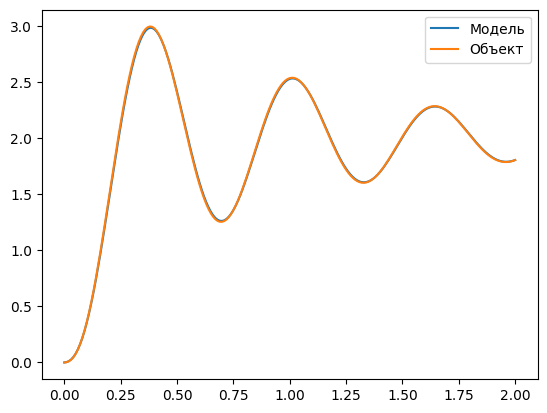

In [3]:
file_path = "test_data/data_for_real.csv"
degree = 3
x, y = np.loadtxt(file_path, delimiter=',', unpack=True)
ident = IdentifyIt(x=x, y=y, degree=3, method=1)
plt.plot(ident.x, ident.y_m, label="Модель")
plt.plot(x, y, label="Объект")
plt.legend()
ident.error

In [4]:
# хочу подать часть синусоиды на какое-нибудь апериодическое звено второго порядка:
# делаю само звено:
sp.var('s')
T1 = 1.2
T2 = 0.5
num = [1]
den = [T1*T2, T2, 1]
aper = co.tf(num, den)
aper

TransferFunction(array([1]), array([0.6, 0.5, 1. ]))

Running method...
LSM is runing...


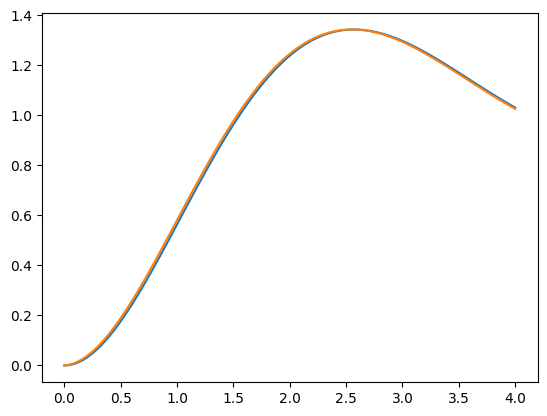

In [5]:
t_f, y_f = co.step_response(aper, 4)
plt.plot(t_f, y_f)
ident2 = IdentifyIt(t_f, y_f, 2, 1)
ident2.error
plt.plot(t_f, ident2.y_m)

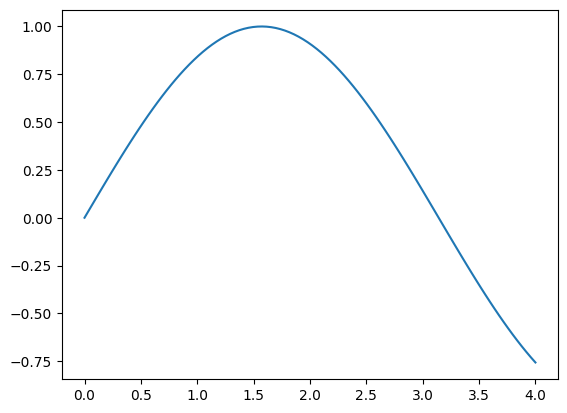

In [6]:
sin_t = np.linspace(0, 4, 100)
u_sin = np.sin(sin_t)
plt.plot(sin_t, u_sin)

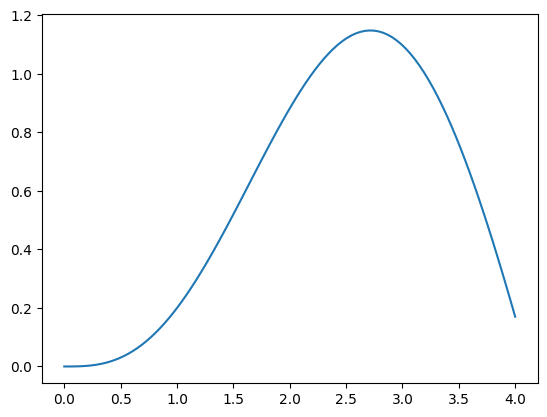

In [7]:
t_forced, y_forced = co.forced_response(aper, sin_t, u_sin)
plt.plot(t_forced, y_forced)

Running method...
LSM is runing...


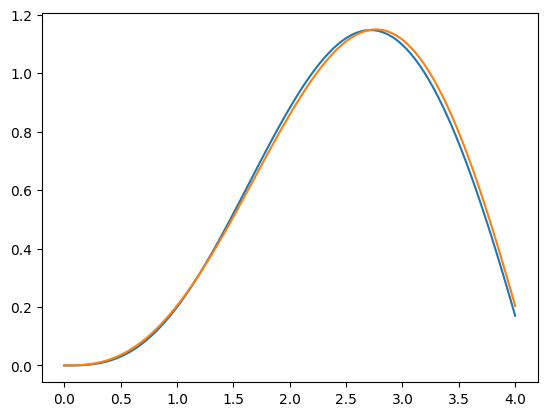

In [19]:
ident3 = IdentifyIt(t_forced, y_forced, 3, 1, u_sin)
ident3.error
plt.plot(t_forced, y_forced)
plt.plot(t_forced, ident3.y_m)